# Author: Süleyman Gölbol - 1801042656



In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import os
import re
import random
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [4]:
# dataset_path = "/content/drive/MyDrive/Colab Notebooks/age_gender.csv"
dataset_path = "datasets/UTK_Data/age_gender.csv"
# Read the dataset of age_gender
dataFrame = pd.read_csv(dataset_path)

In [5]:
def pixel_to_array_converter(pix_vals):
    pix_vals = re.findall(r'\S+', pix_vals)
    pix_vals = np.array(pix_vals, dtype='float32')
    pix_vals = pix_vals.reshape(48, 48)
    return pix_vals

    print(pix_vals)
    print(len(pix_vals))

# disable chained assignments
pd.options.mode.chained_assignment = None     

pix_vals = []
    
for i in range(len(dataFrame['pixels'])):
    # print(len(dataFrame['pixels']))
    pix_vals.append(pixel_to_array_converter(dataFrame['pixels'][i]))
    # Normalizing the data
    # pix_vals[i] = pix_vals[i] / 255.0
# Normalise images


In [6]:
# Shape
print(pix_vals[0].shape)
pix_vals = np.array(pix_vals)
pix_vals = pix_vals.reshape(pix_vals.shape[0], 48, 48, 1)
print(pix_vals.shape)

if np.max(pix_vals) > 1: 
    pix_vals = pix_vals/255

(48, 48)
(23705, 48, 48, 1)


<Figure size 600x400 with 0 Axes>

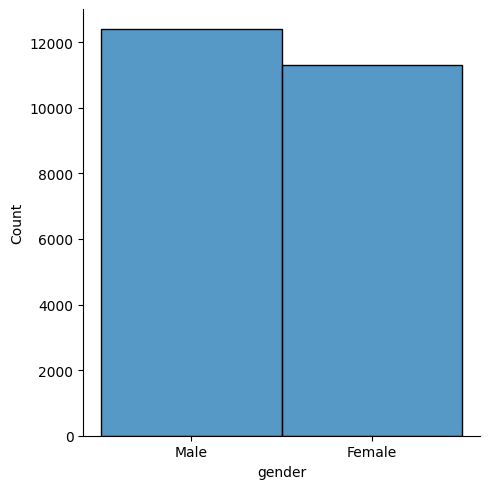

In [8]:
def draw_gender_distributions():
    plt.figure(figsize=(6, 4))
    gender_frame = dataFrame['gender']
    for i in range(len(gender_frame)):
        if gender_frame[i] == 0:
            gender_frame[i] = "Male"
        else:
            gender_frame[i] = "Female"
    
    seaborn.displot(gender_frame)
    plt.show()
draw_gender_distributions()

<Figure size 600x400 with 0 Axes>

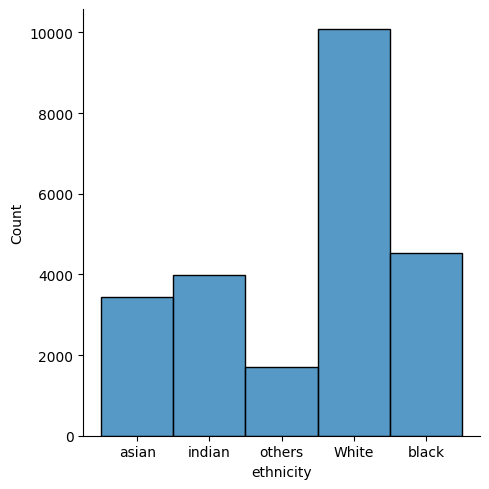

In [7]:
def draw_ethnicity_distributions():
    plt.figure(figsize=(6, 4))
    ethnic_frame = dataFrame['ethnicity']
    for i in range(len(ethnic_frame)):
        if ethnic_frame[i] == 0:
            ethnic_frame[i] = "White"
        elif ethnic_frame[i] == 1:
            ethnic_frame[i] = "black"
        elif ethnic_frame[i] == 2:
            ethnic_frame[i] = "asian"
        elif ethnic_frame[i] == 3:
            ethnic_frame[i] = "indian"    
        elif ethnic_frame[i] == 4:
            ethnic_frame[i] = "others" # arabs and hispanic people etc.
    
    seaborn.displot(ethnic_frame)
    plt.show()
draw_ethnicity_distributions()

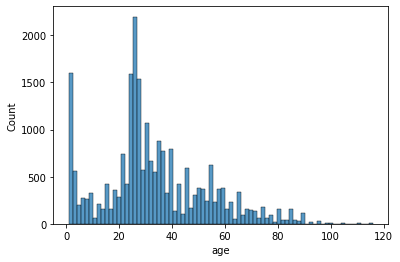

In [8]:
def draw_age_distributions():
    plt.figure(figsize=(6, 4))
    seaborn.histplot(dataFrame['age'])
    plt.show()
draw_age_distributions()

In [9]:
# Printing how many people are in each age group
for i in range(1, 100, 10):
    count_age = dataFrame[dataFrame["age"]==i]["age"].count()
    print("There are " + str(count_age)  + " labelled data for age " + str(i))

There are 1123 labelled data for age 1
There are 65 labelled data for age 11
There are 346 labelled data for age 21
There are 350 labelled data for age 31
There are 132 labelled data for age 41
There are 138 labelled data for age 51
There are 159 labelled data for age 61
There are 33 labelled data for age 71
There are 22 labelled data for age 81
There are 2 labelled data for age 91


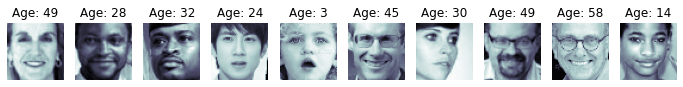

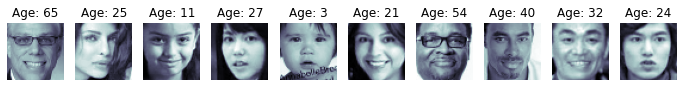

In [10]:
# Some images from the dataset
for i in range(0,2):
    random_image_ids = []
    for i in range(0,10):
        random_image_ids.append(random.randint(0, len(pix_vals)))
        
    figure, axes = plt.subplots(1, 10, figsize=(12, 5))
    for i in range(0, 10):
        age = dataFrame['age'][random_image_ids[i]]
        axes[i].set_title("Age: " + str(age))
        axes[i].imshow(pix_vals[random_image_ids[i]][:,:,0], cmap='bone') # gray or afmhot are also good
        axes[i].axis('off')

    plt.show()

In [11]:
# print(type(np.array(dataFrame['pixels'])))
# list_pixels = np.array(dataFrame['pixels'].tolist())
# print("list_pixels")
# print(type(list_pixels))

# # print(list_pixels)

# 2. PROCESSING

In [12]:
import tensorflow as tf
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

## MODEL A - 20 EPOCHS

In [ ]:
# Split the data to train and test
def shuffle_split_data(X, y):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    # print (len(X_train), len(y_train), len(X_test), len(y_test))
    return X_train, y_train, X_test, y_test

train_x, train_y, test_x, test_y = shuffle_split_data(pix_vals, dataFrame['age'].values)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

16593 16593 7112 7112
(16593, 48, 48, 1)
(16593,)
(7112, 48, 48, 1)
(7112,)


In [40]:
# Create model as sequential
model = keras.Sequential()
# Adding layers to the model
print(pix_vals.shape[1:])

model.add(Conv2D(64, kernel_size=(3,3), input_shape=pix_vals.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


model.summary()



(48, 48, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 23, 23, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                            
                                          

In [41]:
history = model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y), batch_size=64)

Epoch 1/20
260/260 [==============================] - 33s 15ms/step - loss: 209.7766 - mae: 10.7997 - val_loss: 1199.5115 - val_mae: 31.0116
Epoch 2/20
260/260 [==============================] - 3s 13ms/step - loss: 129.6351 - mae: 8.5543 - val_loss: 1529.5345 - val_mae: 36.5578
Epoch 3/20
260/260 [==============================] - 4s 14ms/step - loss: 112.0737 - mae: 7.8856 - val_loss: 360.7557 - val_mae: 16.5459
Epoch 4/20
260/260 [==============================] - 4s 14ms/step - loss: 100.4396 - mae: 7.4887 - val_loss: 88.8150 - val_mae: 6.7848
Epoch 5/20
260/260 [==============================] - 4s 14ms/step - loss: 92.8247 - mae: 7.1645 - val_loss: 134.1221 - val_mae: 8.2412
Epoch 6/20
260/260 [==============================] - 4s 14ms/step - loss: 88.9262 - mae: 6.9739 - val_loss: 123.5191 - val_mae: 8.4615
Epoch 7/20
260/260 [==============================] - 3s 13ms/step - loss: 82.9734 - mae: 6.7898 - val_loss: 228.1134 - val_mae: 10.3020
Epoch 8/20
260/260 [=================

In [ ]:
model.save('models/age_model_a')

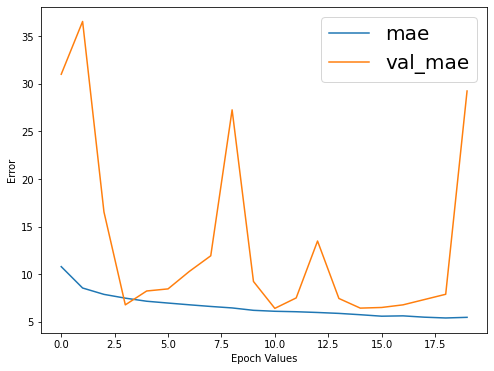

In [44]:
# Drawing the loss/epoch figure
plt.figure(figsize=(8,6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch Values')
plt.ylabel('Error')
plt.legend(loc='upper right', fontsize=20)

In [46]:
loss, mae = model.evaluate(test_x, test_y, verbose=1)

223/223 [==============================] - 1s 5ms/step - loss: 1043.8105 - mae: 29.2528


## MODEL A - 38 EPOCHS

In [12]:
# Split the data to train and test
def shuffle_split_data(X, y):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, 70)

    X_train = X[split]
    y_train = y[split]
    X_test =  X[~split]
    y_test = y[~split]

    print (len(X_train), len(y_train), len(X_test), len(y_test))
    return X_train, y_train, X_test, y_test

train_x, train_y, test_x, test_y = shuffle_split_data(pix_vals, dataFrame['age'].values)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

16593 16593 7112 7112
(16593, 48, 48, 1)
(16593,)
(7112, 48, 48, 1)
(7112,)


In [21]:
# Create model as sequential
model = keras.Sequential()
# Adding layers to the model
print(pix_vals.shape[1:])

model.add(Conv2D(64, kernel_size=(3,3), input_shape=pix_vals.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


model.summary()



(48, 48, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 23, 23, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                             
                                          

In [22]:
history = model.fit(train_x, train_y, epochs=38, validation_data=(test_x, test_y), batch_size=64)

Epoch 1/38
260/260 [==============================] - 4s 14ms/step - loss: 209.5192 - mae: 10.7432 - val_loss: 1909.9983 - val_mae: 40.0445
Epoch 2/38
260/260 [==============================] - 3s 13ms/step - loss: 130.4871 - mae: 8.5323 - val_loss: 1218.8787 - val_mae: 32.0797
Epoch 3/38
260/260 [==============================] - 3s 13ms/step - loss: 113.8335 - mae: 7.9259 - val_loss: 109.7609 - val_mae: 7.5506
Epoch 4/38
260/260 [==============================] - 3s 13ms/step - loss: 99.9949 - mae: 7.4581 - val_loss: 103.3144 - val_mae: 7.3158
Epoch 5/38
260/260 [==============================] - 4s 14ms/step - loss: 92.5169 - mae: 7.1288 - val_loss: 113.6522 - val_mae: 7.9794
Epoch 6/38
260/260 [==============================] - 3s 13ms/step - loss: 87.8627 - mae: 6.9936 - val_loss: 150.9832 - val_mae: 9.5717
Epoch 7/38
260/260 [==============================] - 4s 14ms/step - loss: 84.5669 - mae: 6.8249 - val_loss: 119.9612 - val_mae: 8.4055
Epoch 8/38
260/260 [====================

In [ ]:
model.save('Models/age_model_a.h5')

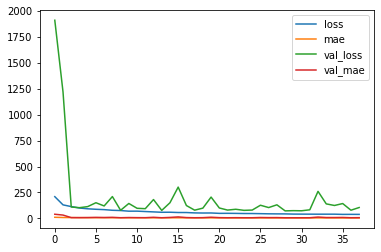

In [24]:
pd.DataFrame(history.history).plot()

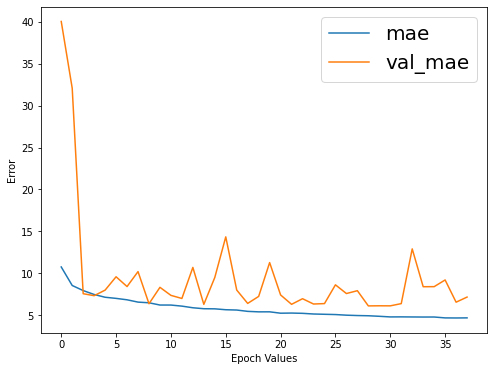

In [36]:
plt.figure(figsize=(8,6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch Values')
plt.ylabel('Error')
plt.legend(loc='upper right', fontsize=20)

In [25]:
loss, acc = model.evaluate(test_x, test_y, verbose=1)

223/223 [==============================] - 1s 4ms/step - loss: 104.8647 - mae: 7.1492
